Simple Python Notebook

In [1]:
import yfinance as yf
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
UPRO = yf.download(tickers='UPRO')

[*********************100%***********************]  1 of 1 completed


In [4]:
SPY = yf.download(tickers='SPY')

[*********************100%***********************]  1 of 1 completed


In [5]:
start = '2011-06-27'
end = '2021-06-25'
ratio1 = 100/UPRO.loc[start]['Adj Close']
ratio2 = 100/SPY.loc[start]['Adj Close']

In [6]:
spy_ob = yf.Ticker('SPY')
upro_ob = yf.Ticker('UPRO')

In [7]:
upro = np.array(UPRO.loc[start:end]['Adj Close']*ratio1)
spy = np.array(SPY.loc[start:end]['Adj Close']*ratio2)

In [8]:
days = len(upro)

In [9]:
upro[0] == spy[0]

True

In [10]:
ratio1, ratio2

(17.17211136809638, 0.9511422095189109)

In [11]:
ratio1*sum(upro_ob.dividends.loc[start:end]), ratio2*sum(spy_ob.dividends.loc[start:end])

(13.500164450033596, 42.13274645505919)

In [12]:
day = np.arange(1, days + 1)

In [13]:
upro[0], spy[0], day[-1]

(100.0, 100.0, 2517)

In [14]:
spy[-1], upro[-1], upro[-1]/spy[-1]

(405.76676407011536, 1927.054358689826, 4.74916757439709)

In [15]:
from matplotlib.pyplot import figure

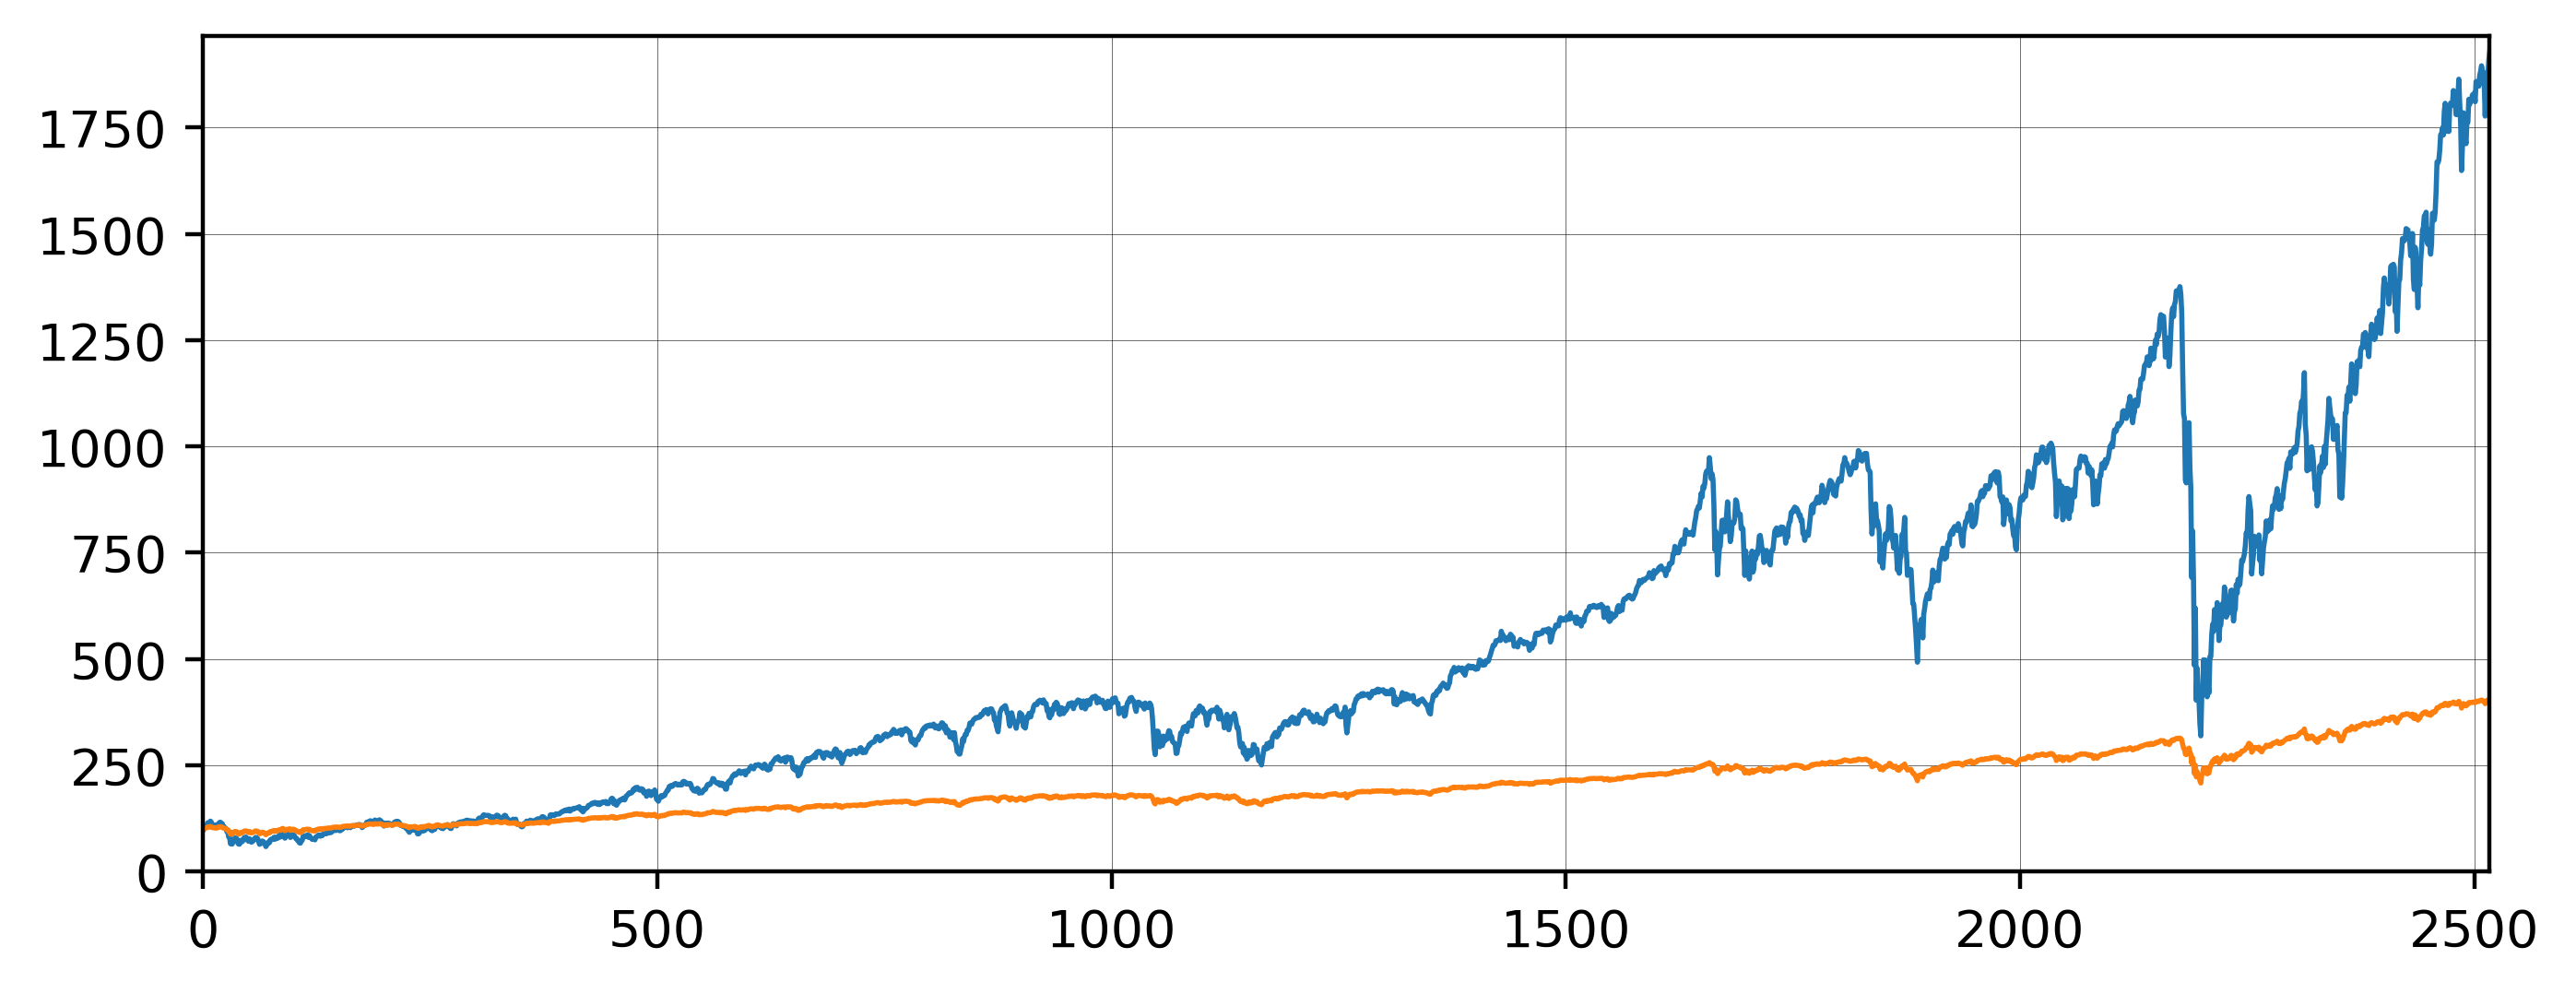

In [80]:
last = day[-1]
first = 0
ymax = int(1.02*max(upro[:last].max(),spy[:last].max()) )
figure(figsize=(8, 3), dpi=400)
plt.plot(day[first:last], upro[first:last], linewidth=1)
plt.plot(day[first:last], spy[first:last], linewidth=1)
plt.axis([first, last, 0, ymax])
# plt.tick_params(labeltop=True, labelright=True)
plt.grid(color='k', linestyle='-', linewidth=0.1)
#plt.yscale('log')

plt.show()

In [17]:
upro_daily_rate = np.array( [(upro[x]-upro[x-1])/upro[x-1] for x in range(1, day[-1])] )
spy_daily_rate = np.array( [(spy[x]-spy[x-1])/spy[x-1] for x in range(1, day[-1])] )

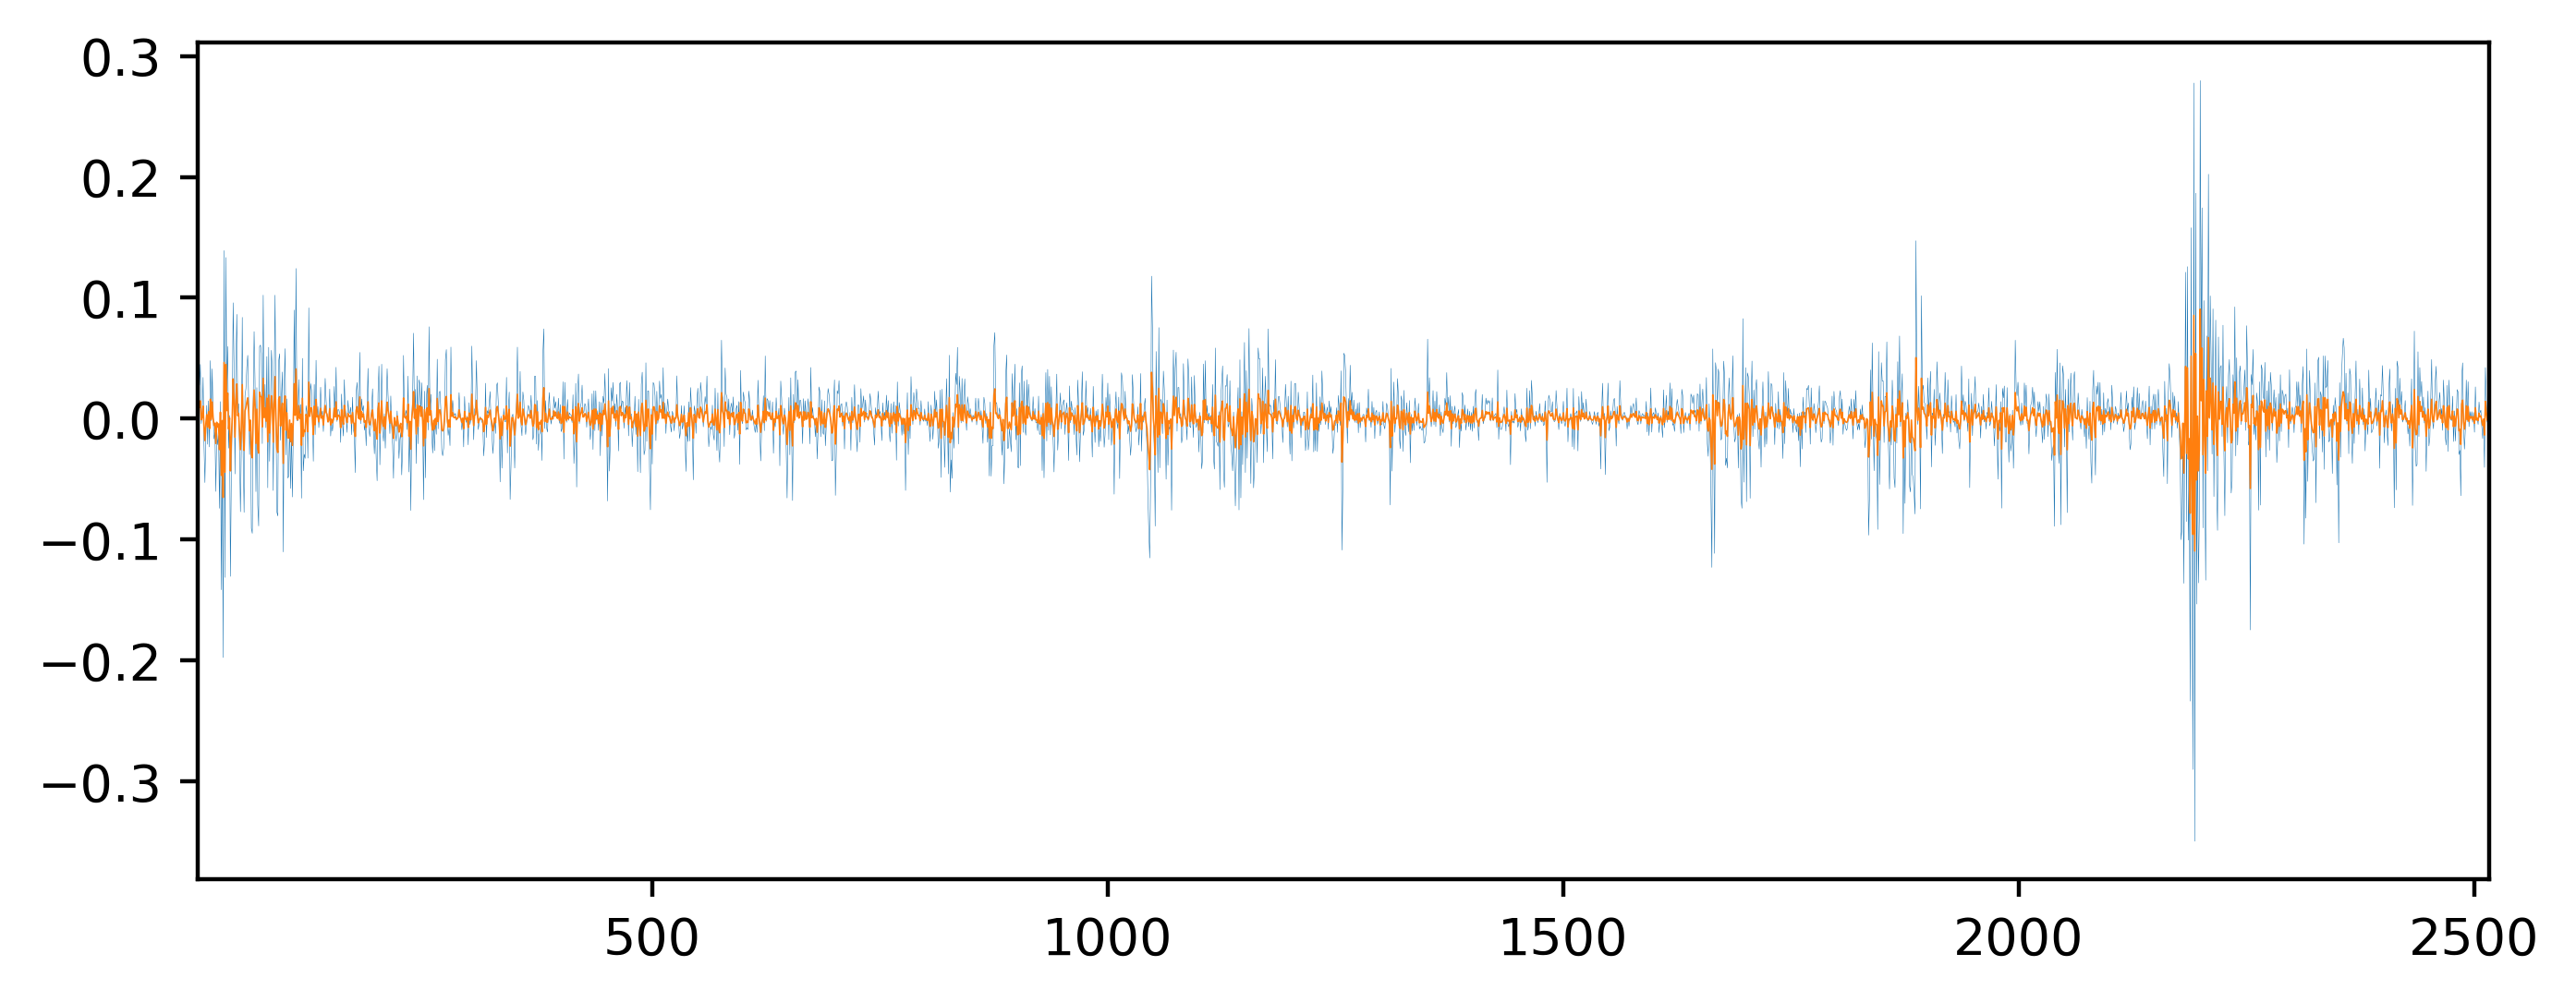

In [18]:
figure(figsize=(8, 3), dpi=400)
plt.plot(day[:-1], upro_daily_rate, linewidth=0.1)
plt.plot(day[:-1], spy_daily_rate, linewidth=0.3)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [19]:
bins = [0.005*x for x in range(-50, 50)]

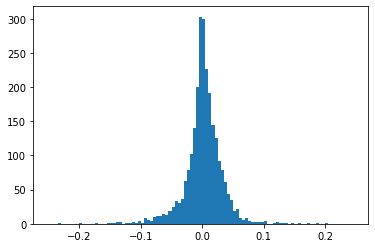

In [20]:
plt.hist(upro_daily_rate,bins=bins)
plt.show()

In [21]:
np.mean(upro_daily_rate), np.std(upro_daily_rate)

(0.001726402591938179, 0.03277201616504373)

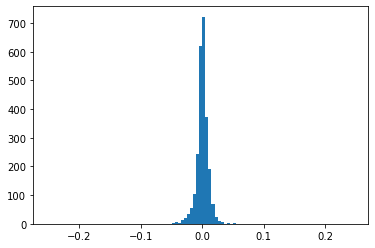

In [22]:
plt.hist(spy_daily_rate,bins=bins)
plt.show()

In [23]:
np.mean(spy_daily_rate), np.std(spy_daily_rate)

(0.0006160481374975959, 0.010854070816957844)

In [57]:
ratios_indices = np.array([x for x in range(0, day[-1] - 1) if upro_daily_rate[x] != 0 and spy_daily_rate[x] != 0])
ratios_indices

array([   0,    1,    2, ..., 2513, 2514, 2515])

In [58]:
upro_rate = np.array( [upro_daily_rate[x] for x in ratios_indices] )
spy_rate = np.array( [spy_daily_rate[x] for x in ratios_indices] )

In [59]:
def trimmer(upro, spy):
    ratios = upro/spy
    mu = np.mean(ratios)
    error = 3*np.std(ratios)
    indices_range = np.where(np.logical_and((mu-error) <= ratios, ratios <= (mu+error)))[0]
    output_upro = np.array([upro[x] for x in indices_range])
    output_spy = np.array([spy[x] for x in indices_range])
    return output_upro, output_spy

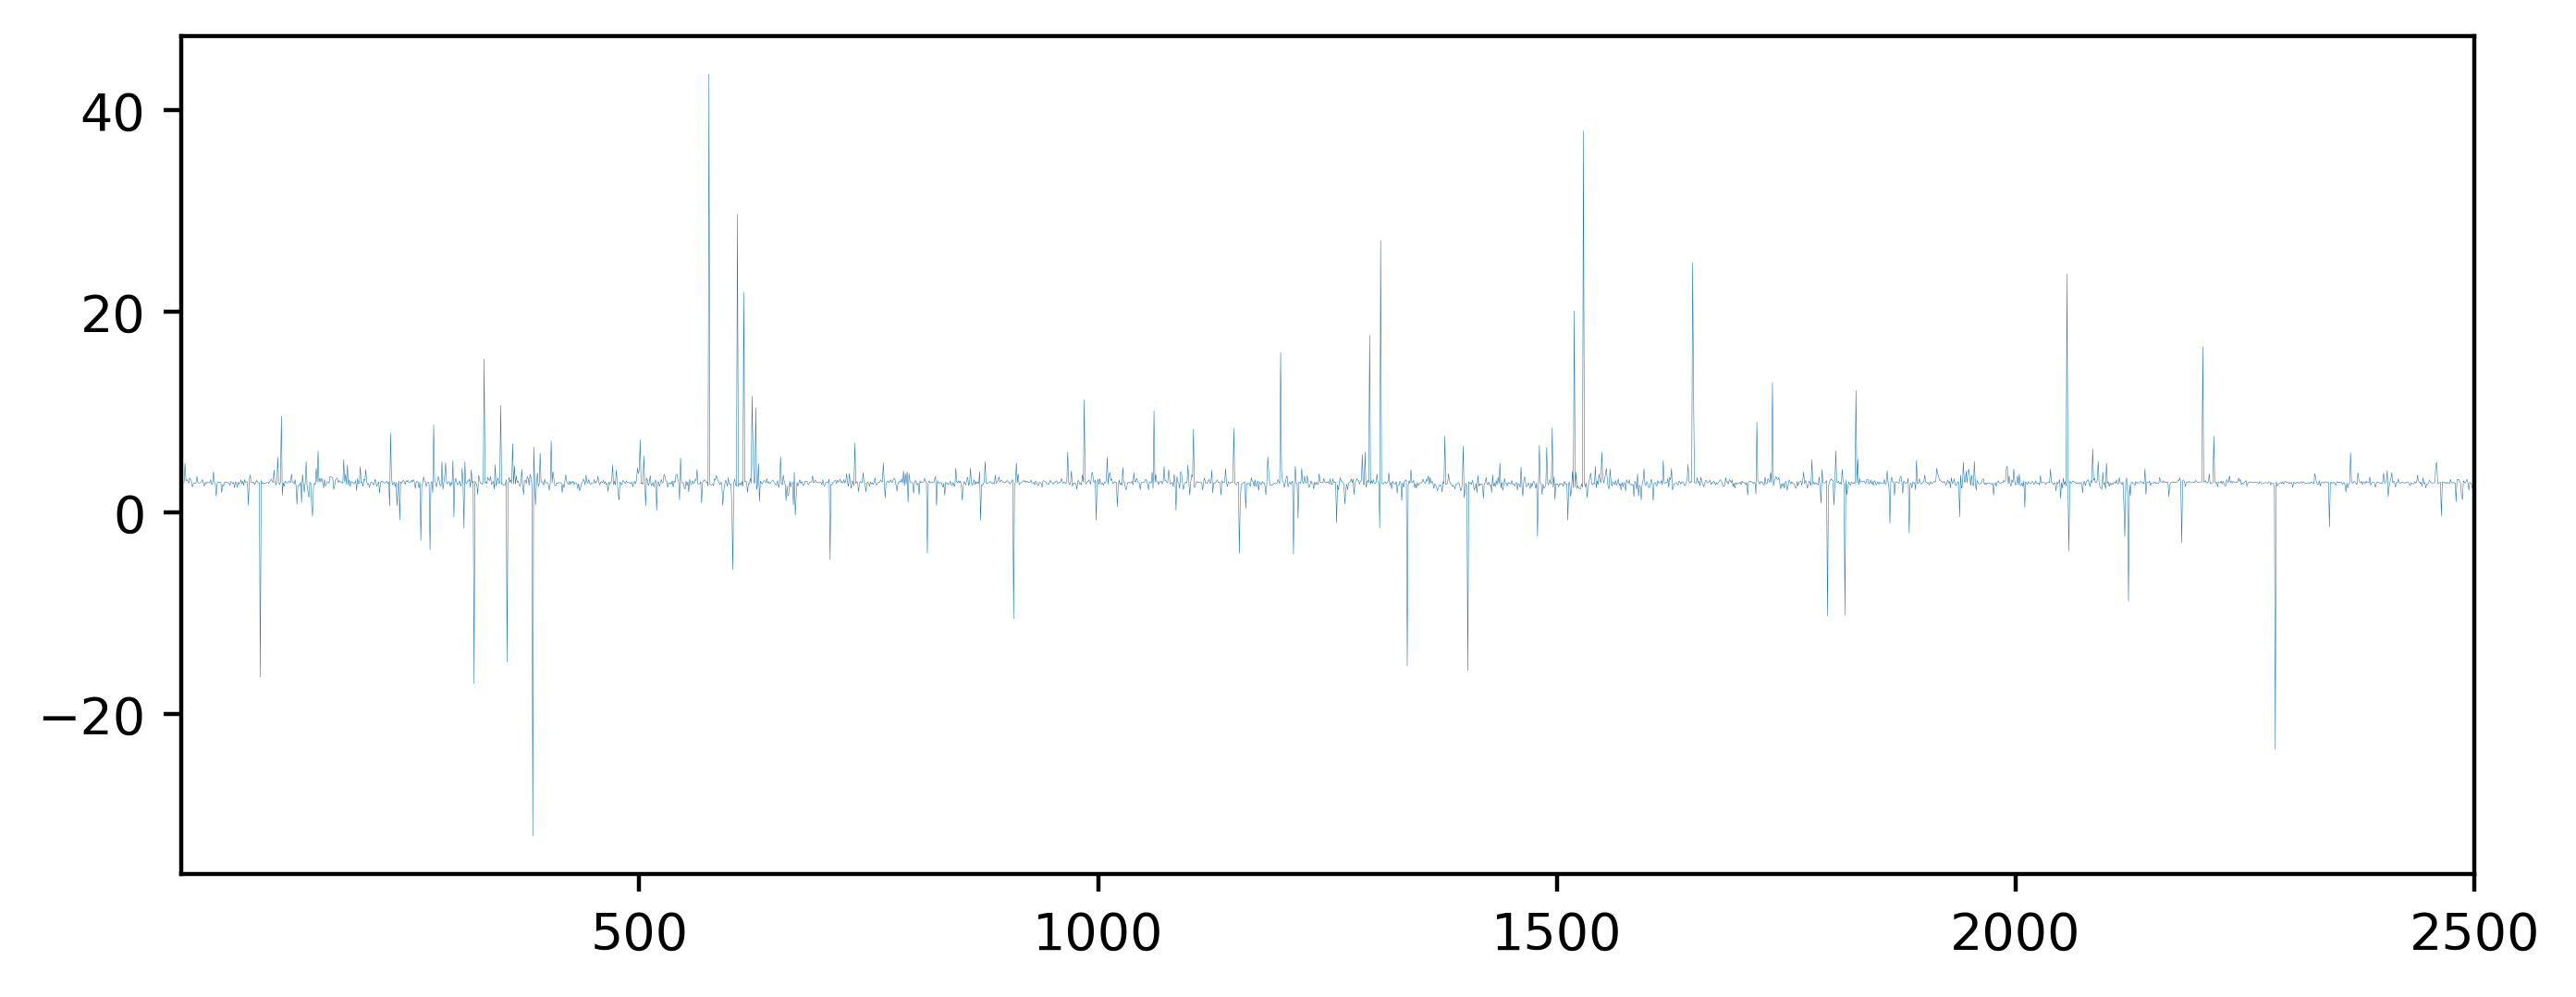

In [60]:
figure(figsize=(8, 3), dpi=400)
plt.plot(day_non_zero, rate_ratios, linewidth=0.1)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [77]:
upro_rate, spy_rate = trimmer(upro_rate, spy_rate)

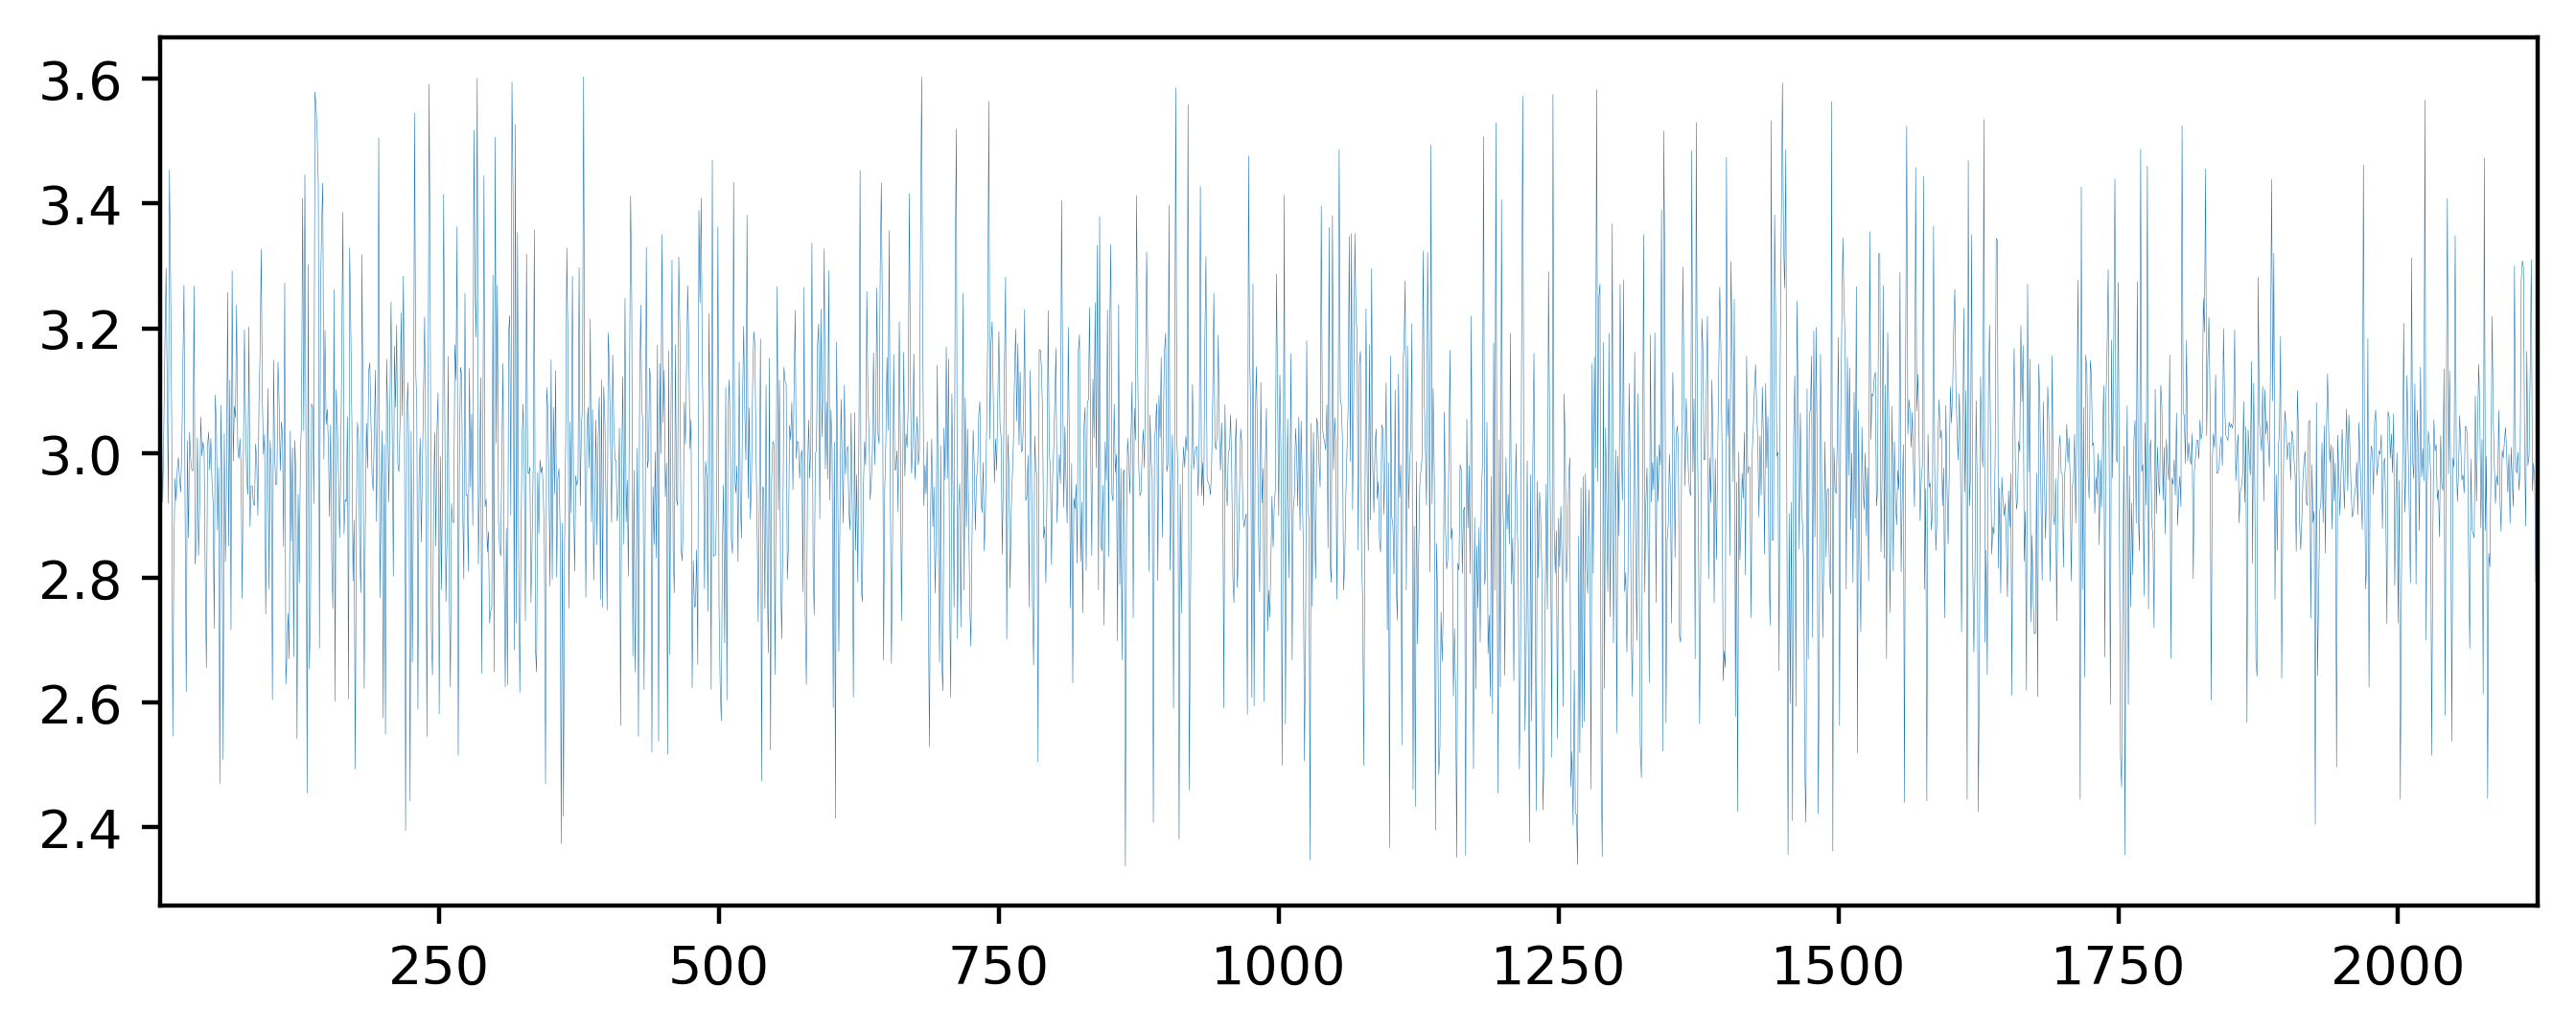

In [78]:
rate_ratios = upro_rate/spy_rate
days = np.arange(1, len(rate_ratios) + 1)
figure(figsize=(8, 3), dpi=400)
plt.plot(days, rate_ratios, linewidth=0.1)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [94]:
ascending_index = np.argsort(spy_rate)
spy_ordered = np.sort(spy_rate)
ratios_ordered = np.array([rate_ratios[x] for x in ascending_index])

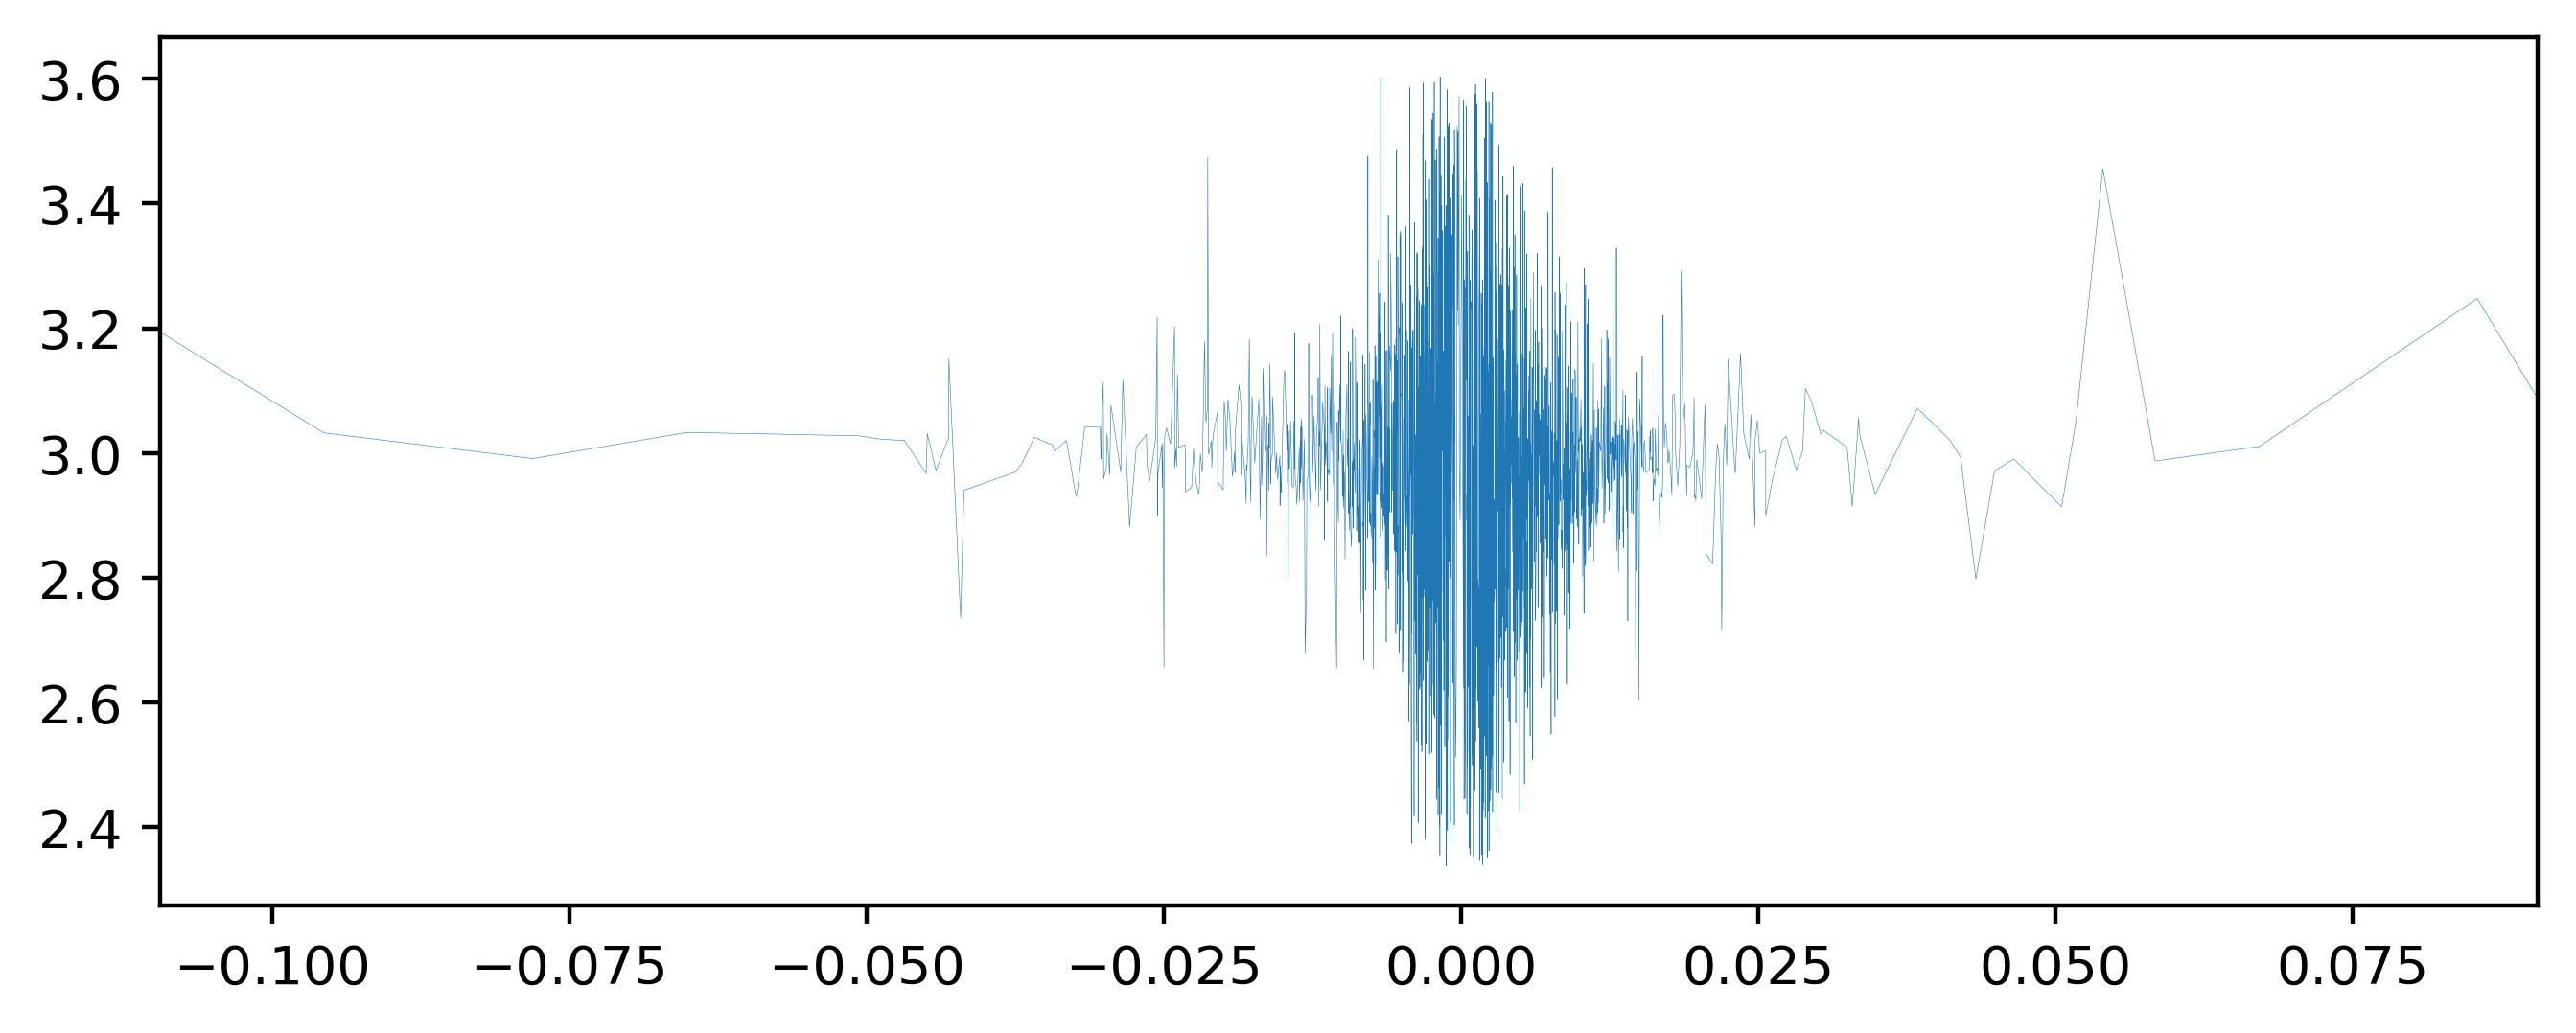

In [95]:
figure(figsize=(8, 3), dpi=400)
plt.plot(spy_ordered, ratios_ordered, linewidth=0.1)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

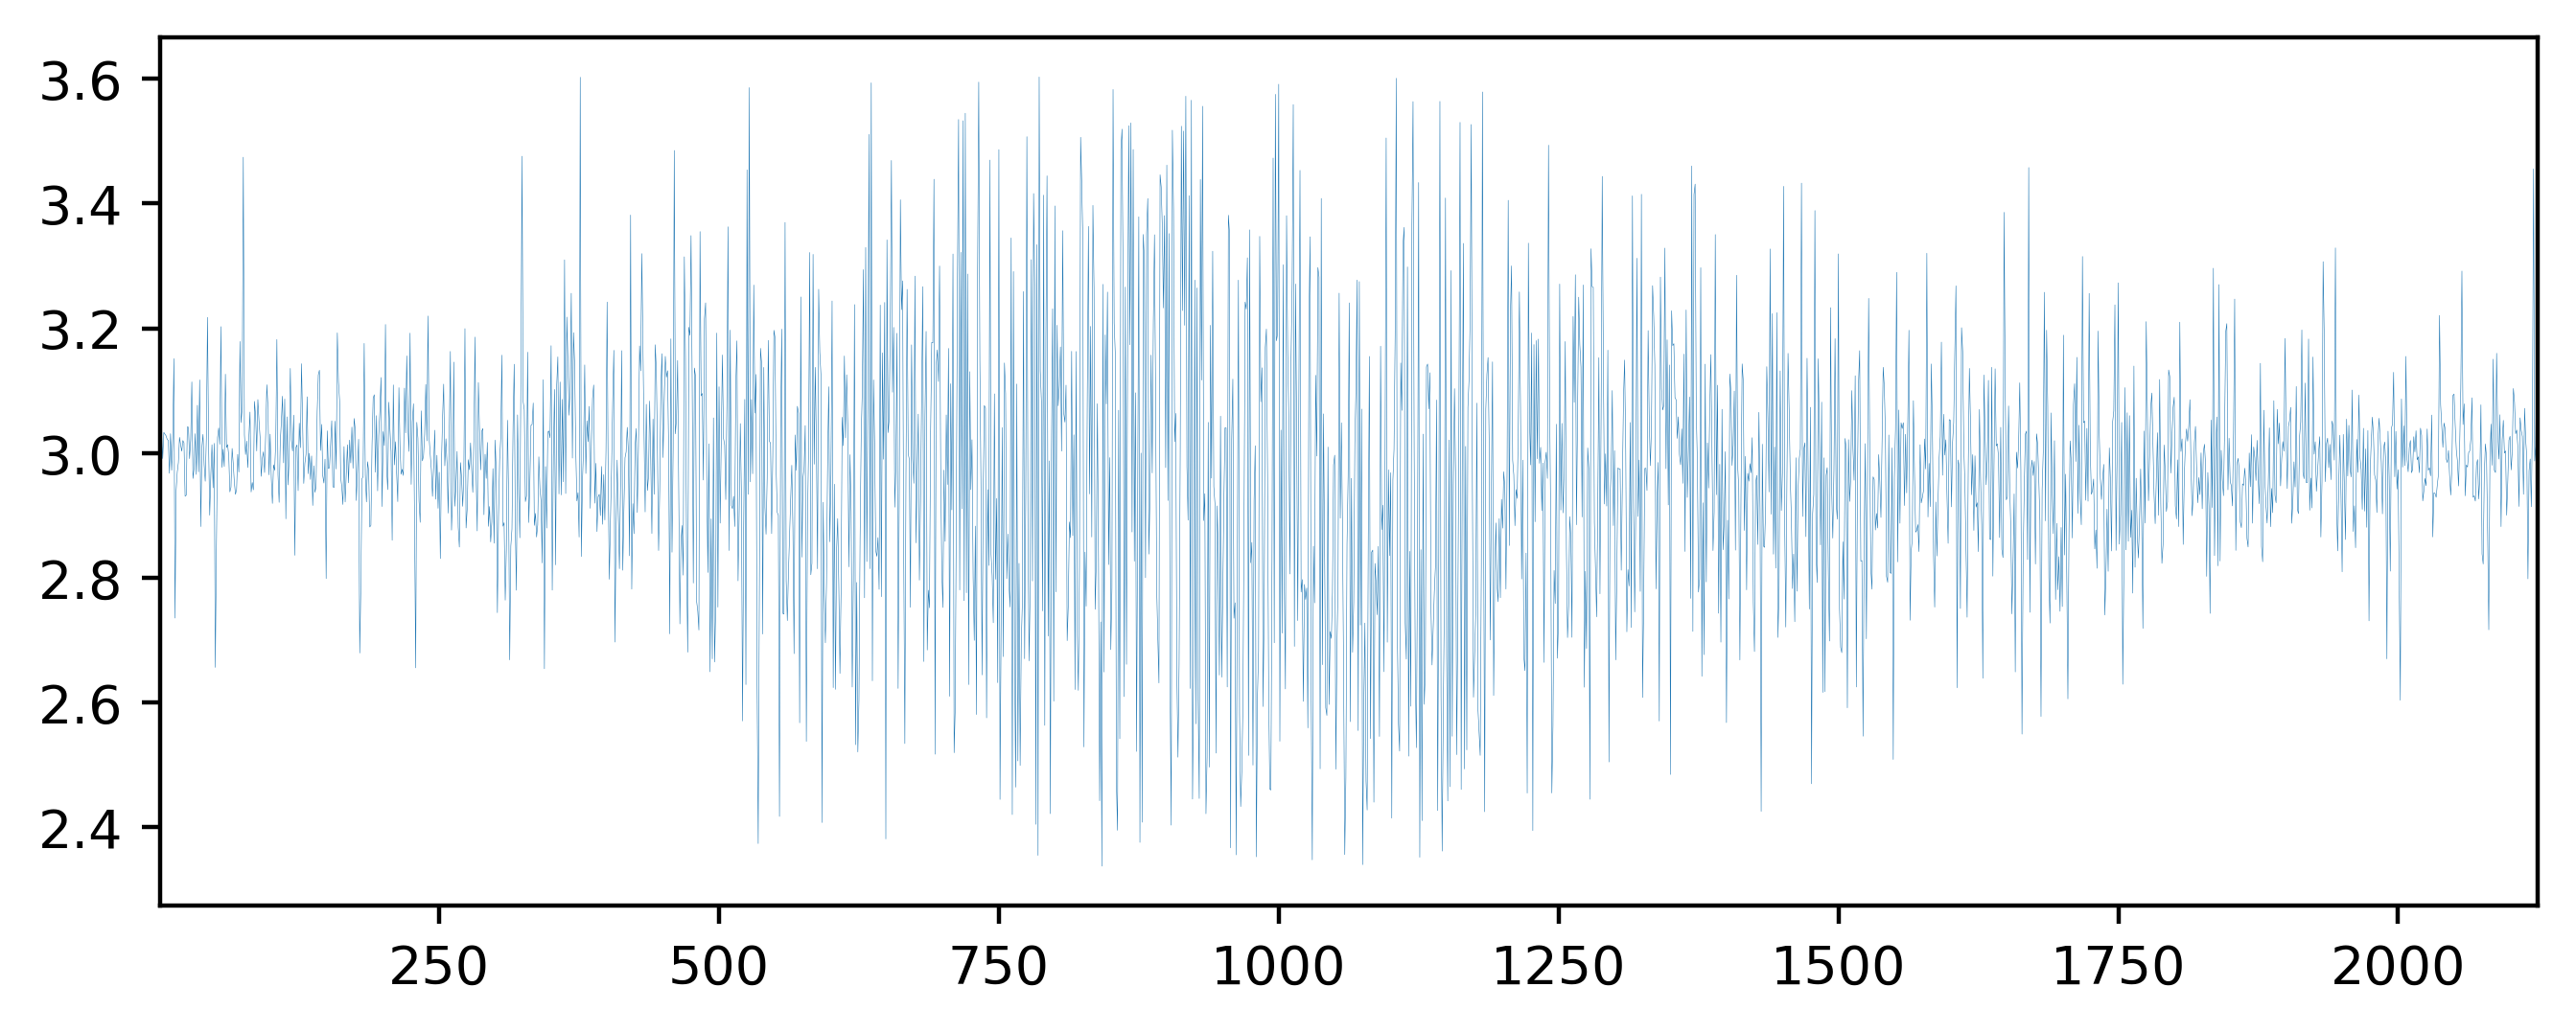

In [96]:
x = np.arange(1, len(ratios_ordered) + 1)
figure(figsize=(8, 3), dpi=400)
plt.plot(x, ratios_ordered, linewidth=0.1)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [97]:
np.mean(ratios_ordered), np.std(ratios_ordered)

(2.9684440581588643, 0.20908956165565873)

### Threading

In [3]:
import threading

In [4]:
import time

In [7]:
def sleeping():
    print('Sleeping for 2 seconds....')
    time.sleep(2)
    print('Done sleeping!!')

In [8]:
start = time.perf_counter()
sleeping()
sleeping()
stop = time.perf_counter()

Sleeping for 2 seconds....
Done sleeping!!
Sleeping for 2 seconds....
Done sleeping!!


In [9]:
stop - start

4.004703047000021

In [25]:
t1 = threading.Thread(target=sleeping)
t2 = threading.Thread(target=sleeping)

In [26]:
start = time.perf_counter()
t1.start()
t2.start()

t1.join()
t2.join()
stop = time.perf_counter()

print(stop - start)

Sleeping for 2 seconds....
Sleeping for 2 seconds....
Done sleeping!!
Done sleeping!!
2.003387087999954


In [36]:
threads = [threading.Thread(target=sleeping) for _ in range(10)]

In [37]:
start = time.perf_counter()

for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join()
stop = time.perf_counter()

print(stop - start)

Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....Sleeping for 1.5 second(s)....

Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
1.5110819419996915


In [31]:
def sleeping(seconds):
    print(f'Sleeping for {seconds} second(s)....')
    time.sleep(seconds)
    print('Done sleeping!!')

In [38]:
threads = [threading.Thread(target=sleeping, args=[1.5]) for _ in range(10)]

In [39]:
start = time.perf_counter()

for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join()
stop = time.perf_counter()

print(stop - start)

Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....

Sleeping for 1.5 second(s)....Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....

Sleeping for 1.5 second(s)....
Sleeping for 1.5 second(s)....
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
Done sleeping!!
1.5149131810003382
